# EDA

## IMPORTING PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

#To increase autocomplete response speed
%config IPCompleter.greedy=True

## DATA IMPORTATION

Project path.

In [2]:
project_path = '../..'

Names of data files.

In [3]:
cat_name = 'cat_result_quality.pickle'
num_name = 'num_result_quality.pickle'

Data importation

In [4]:
cat = pd.read_pickle(project_path + '/02_Data/03_Work/' + cat_name)
num = pd.read_pickle(project_path + '/02_Data/03_Work/' + num_name)

## SEED QUESTIONS

In order to guide the process, a series of seed questions were posed which served as a basis for developing and deepening the analysis of the different features.

**Regarding Borrowers:**
- Q1: What are the most frequent professions of clients applying for loans?
- Q2: How is the score feature assigned by the company to each applicant performing?
- Q3: Can different customer behaviour profiles be distinguished with regard to the way they use their credit cards?

**Regarding Loans:**
- Q4: Regarding the percentage of late payments and carged-offs, are there differences between 36 and 60 month loans?
- Q5: Can specific loan purposes be identified as more likely to default than others?

## EDA - CATEGORICAL FEATURES

### Statistical analysis

In [5]:
var_cat = [f for f in cat.columns.to_list() if f not in ['description','employment_title']]

In [6]:
def frequency_categorical(dataframe, features_to_analyse):
    dataframe = dataframe[features_to_analyse]
    check = (~((dataframe.dtypes == 'category')|(dataframe.dtypes == 'object'))).sum()
    
    if check>0:
        dataframe = dataframe.select_dtypes(['O','category'])
        print('Features of dtype = [number, datetimes, timedeltas, datetimetz] have been omitted from this analysis.')
    
    freq_results = dataframe.apply(lambda x: x.value_counts(normalize=True)).T.stack()\
                   .to_frame().reset_index()\
                   .rename(columns={'level_0':'feature','level_1':'value',0:'frequency'})\
                   .sort_values(by=['feature','frequency'],ascending=True)
    return(freq_results)

In [7]:
frequency_categorical(cat,var_cat)

,feature,value,frequency
9,employment_length,9 years,0.035077
8,employment_length,8 years,0.041045
7,employment_length,7 years,0.041081
6,employment_length,6 years,0.045005
4,employment_length,4 years,0.060973
5,employment_length,5 years,0.062766
11,employment_length,Unknown,0.064782
0,employment_length,1 year,0.065528
3,employment_length,3 years,0.080893
10,employment_length,< 1 year,0.084372


In [8]:
cat.employment_title.value_counts(normalize=True)[:20]

Unknown               0.073633
Teacher               0.017904
Manager               0.015351
Owner                 0.009806
Registered Nurse      0.007216
RN                    0.006635
Driver                0.006355
Supervisor            0.006262
Sales                 0.005488
Project Manager       0.004813
Office Manager        0.004641
Director              0.004168
General Manager       0.003874
owner                 0.003701
President             0.003472
Engineer              0.003149
manager               0.003084
teacher               0.002884
Operations Manager    0.002575
Nurse                 0.002525
Name: employment_title, dtype: float64

### Graphical analysis

In [9]:
def plot_eda_categorical(dataframe, features_to_analyse):
    dataframe = dataframe[features_to_analyse]
    
    from math import ceil
    n_rows = ceil(dataframe.shape[1] / 2)
    
    f, ax = plt.subplots(nrows = n_rows, ncols = 2, figsize = (16, n_rows * 6), constrained_layout=True)
    
    #ax is flattened to facilitate iteration through the graph as if it were 1-dimensional.
    ax = ax.flat 
    
    for i, feature in enumerate(dataframe):
        sns.countplot(data=dataframe, y=feature, ax=ax[i], palette='bone', alpha=0.8, 
                      order=dataframe[feature].value_counts().index)
        ax[i].set_title(feature, fontsize = 14, fontweight = "bold")
        ax[i].set_xlabel('Count',fontsize=13)
        ax[i].set_ylabel(feature, fontsize=13)
        ax[i].tick_params(labelsize = 12)

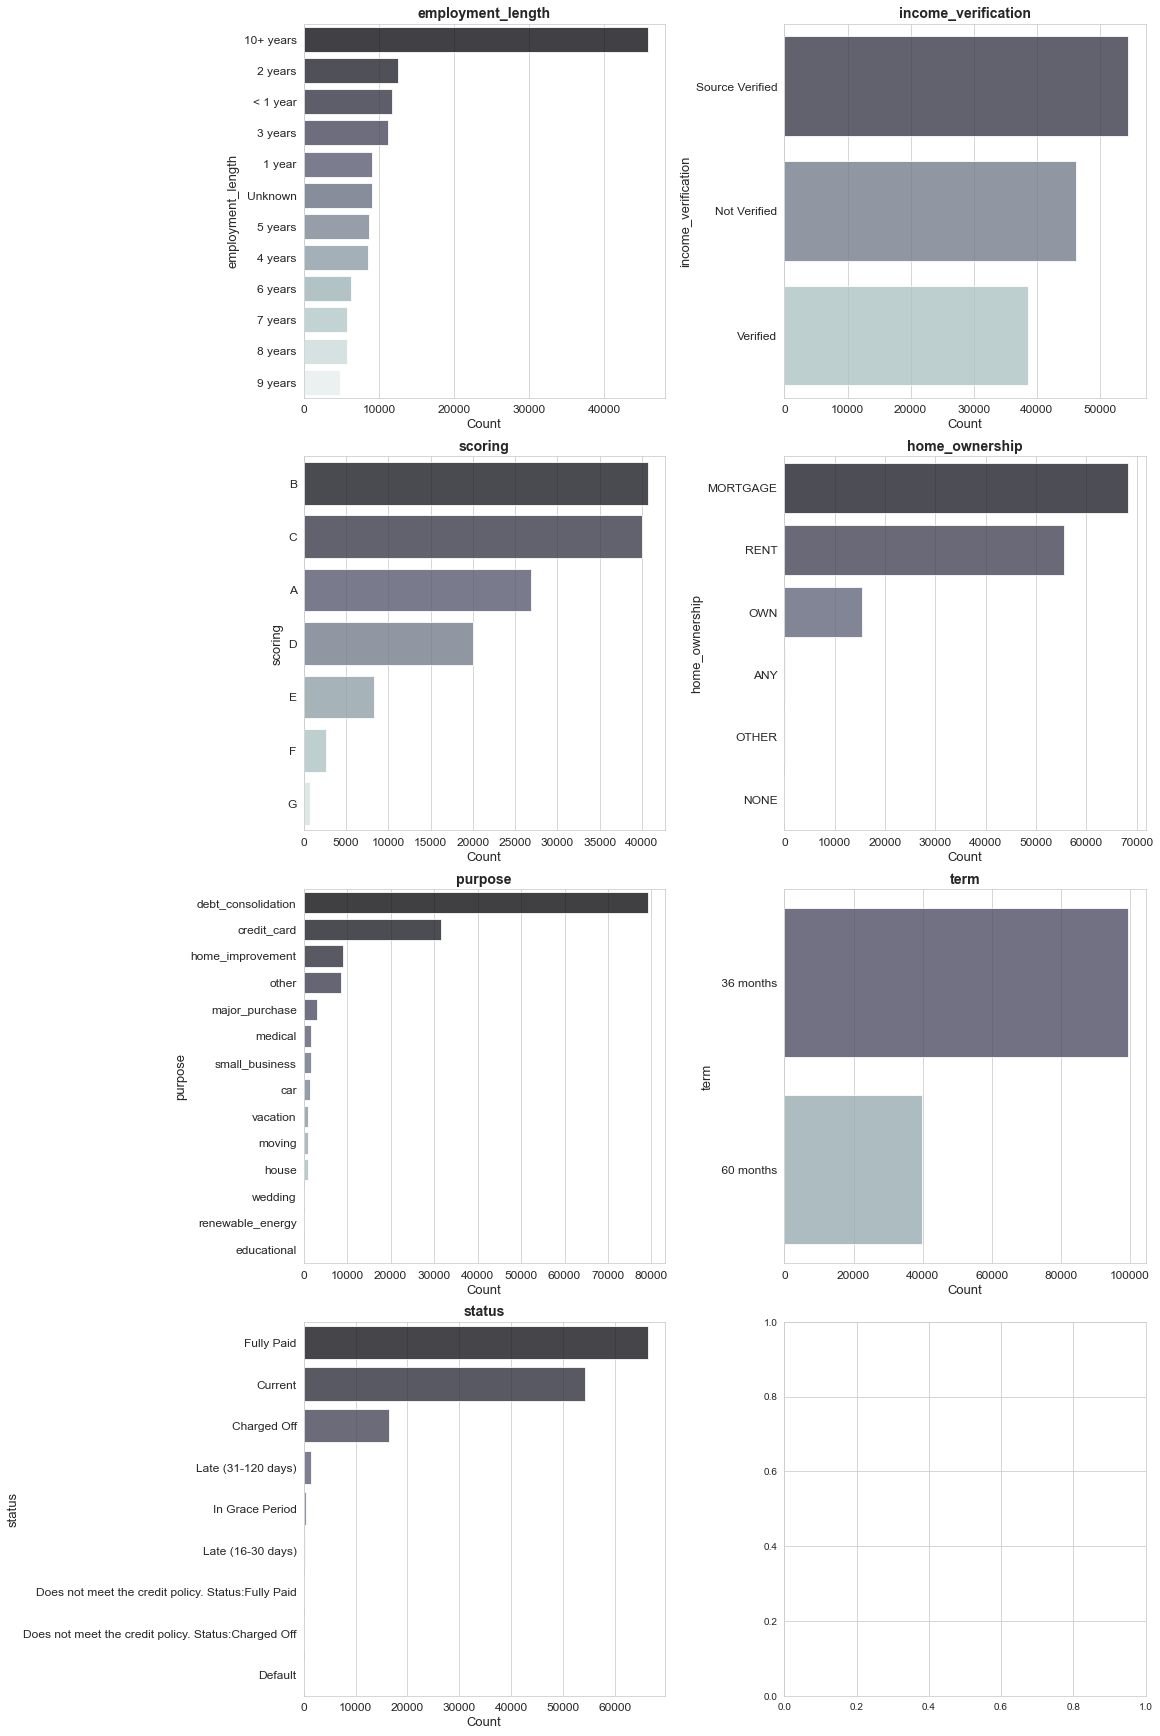

In [10]:
plot_eda_categorical(cat,var_cat)

`home_ownership`: 'ANY', 'OTHER' and 'NONE' categories have almost zero frequency. Mentioned categories will be grouped under the majority category ('MORTGAGE').

`purpose`: 'wedding', 'renewable_energy' and 'educational' purposes will be grouped under 'other' category as their counts are residual.

`status`: This feature will be used to create the target for the probability of default predictive model.

`employment_length`: One third of all customers have been employed for more than 10 years.

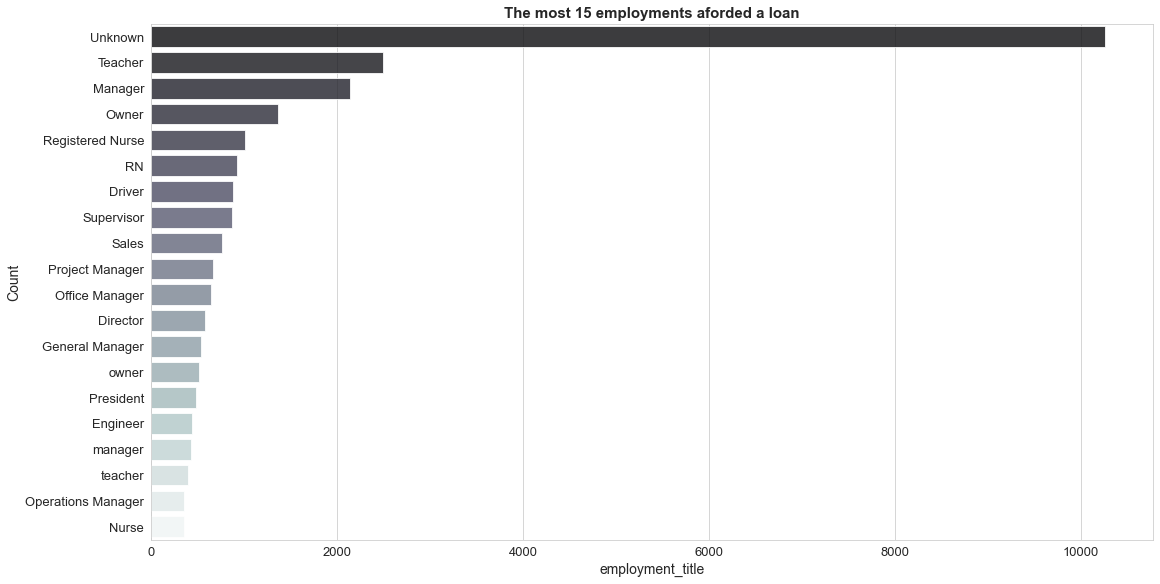

In [11]:
f, ax = plt.subplots(figsize = (16,8), constrained_layout=True)
sns.countplot(data=cat, y='employment_title', ax=ax, order=cat.employment_title.value_counts()[:20].index, 
              palette='bone', alpha=0.8)
ax.set_title('The most 15 employments aforded a loan', fontsize = 15, fontweight = "bold")
ax.set_xlabel('employment_title',fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(labelsize = 13)

`employment_title`: the job title of most clients is unknown. Of the clients who do provide this information, the top three jobs are 'Teacher', 'Manager' and 'Owner'.

The above features are analysed below segmented by `status` feature.

In [12]:
def plot_eda_categorical_segmented(dataframe, features_to_analyse, f_segmentation):
    dataframe = dataframe[features_to_analyse]
    
    n_rows = dataframe.shape[1]
    f, ax = plt.subplots(nrows = n_rows, ncols = 1, figsize = (16, n_rows * 10), constrained_layout=True)
    
    #ax is flattened to facilitate iteration through the graph as if it were 1-dimensional.
    ax = ax.flat 
    
    for i, feature in enumerate(dataframe):
        sns.countplot(data=dataframe, y=feature, hue=f_segmentation, ax=ax[i], palette='pastel', alpha=0.8, 
                      order=dataframe[feature].value_counts().index)
        ax[i].set_title(feature, fontsize = 14, fontweight = "bold")
        ax[i].set_xlabel('Count',fontsize=13)
        ax[i].set_ylabel(feature, fontsize=13)
        ax[i].tick_params(labelsize = 12)
        ax[i].legend(loc='lower right', fontsize=12)  

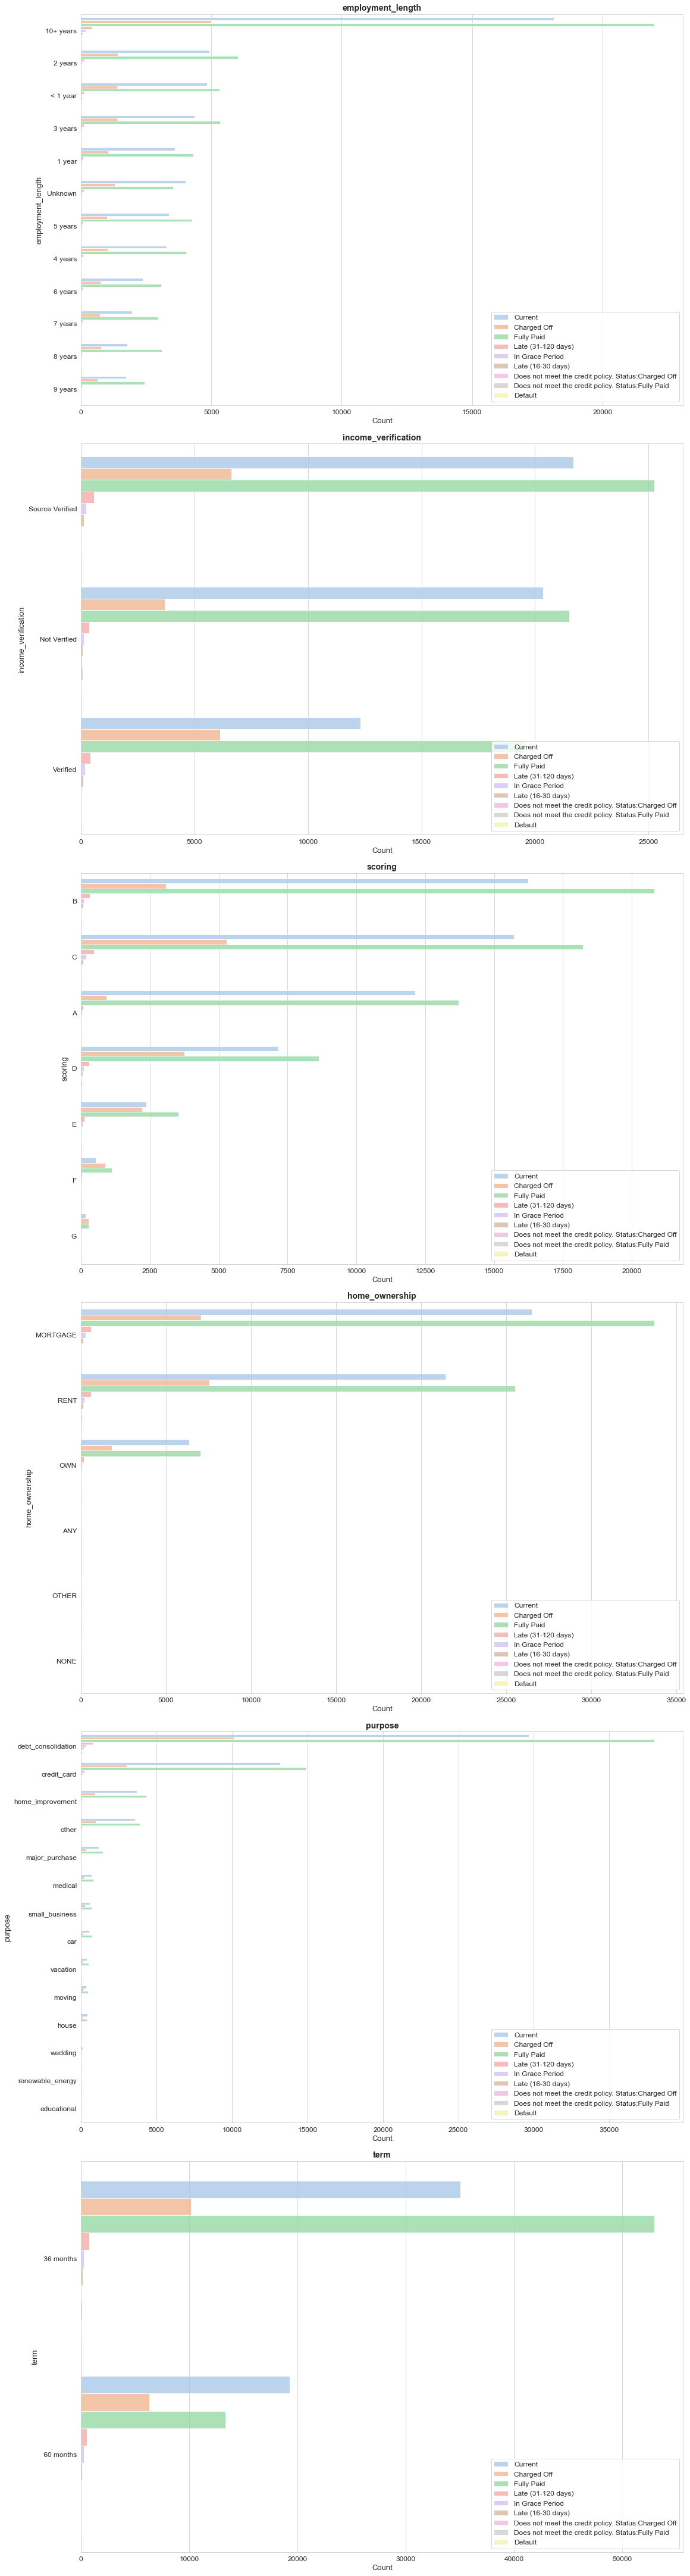

In [13]:
plot_eda_categorical_segmented(cat,var_cat[:-1],cat['status'])

The presence of each of the categories of the `status` feature in the different categories of the rest of the categorical features is nalysed and compared below.

In [14]:
for f in var_cat[:-1]:
    print(str(f) + '\n' + 50*'-')
    display(cat[var_cat].groupby([f,'status']).count().iloc[:,1].unstack().fillna(0). \
                transform(lambda x: round(100*x/sum(x),2), axis=1) \
               .style.highlight_max(color = 'palegreen', axis=0) \
               .highlight_min(color = 'lightcoral', axis=0))
    print('\n')

employment_length
--------------------------------------------------


status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
employment_length,,,,,,,,,
1 year,11.550000,39.510000,0.000000,0.050000,0.150000,47.140000,0.430000,0.160000,1.010000
10+ years,10.880000,39.590000,0.000000,0.020000,0.040000,48.050000,0.380000,0.160000,0.880000
2 years,11.200000,39.230000,0.000000,0.040000,0.100000,47.820000,0.380000,0.180000,1.050000
3 years,12.370000,38.590000,0.010000,0.030000,0.080000,47.360000,0.410000,0.200000,0.950000
4 years,12.150000,38.730000,0.000000,0.080000,0.090000,47.420000,0.270000,0.190000,1.060000
5 years,11.510000,38.420000,0.000000,0.060000,0.090000,48.510000,0.390000,0.230000,0.790000
6 years,11.950000,37.730000,0.000000,0.020000,0.080000,48.880000,0.270000,0.180000,0.890000
7 years,12.710000,34.050000,0.000000,0.020000,0.070000,51.530000,0.370000,0.330000,0.930000
8 years,13.560000,30.860000,0.000000,0.050000,0.070000,54.110000,0.310000,0.230000,0.800000




income_verification
--------------------------------------------------


status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
income_verification,,,,,,,,,
Not Verified,8.000000,44.030000,0.000000,0.080000,0.170000,46.520000,0.280000,0.170000,0.760000
Source Verified,12.160000,39.790000,0.000000,0.010000,0.020000,46.350000,0.410000,0.210000,1.050000
Verified,15.830000,31.810000,0.000000,0.030000,0.070000,50.540000,0.440000,0.240000,1.040000




scoring
--------------------------------------------------


status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
scoring,,,,,,,,,
A,3.440000,45.110000,0.000000,0.000000,0.000000,50.970000,0.120000,0.060000,0.290000
B,7.610000,39.940000,0.000000,0.010000,0.040000,51.200000,0.250000,0.180000,0.780000
C,13.210000,39.320000,0.000000,0.020000,0.070000,45.540000,0.470000,0.200000,1.150000
D,18.740000,35.660000,0.000000,0.070000,0.170000,43.010000,0.570000,0.340000,1.430000
E,26.530000,28.270000,0.000000,0.170000,0.280000,42.260000,0.720000,0.320000,1.460000
F,33.780000,20.560000,0.000000,0.190000,0.270000,42.460000,0.720000,0.460000,1.560000
G,36.110000,22.220000,0.000000,0.530000,1.060000,35.980000,1.060000,0.660000,2.380000




home_ownership
--------------------------------------------------


status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
home_ownership,,,,,,,,,
ANY,5.560000,57.410000,0.000000,0.000000,0.000000,27.780000,3.700000,0.000000,5.560000
MORTGAGE,10.340000,38.800000,0.000000,0.030000,0.070000,49.350000,0.370000,0.190000,0.850000
NONE,33.330000,0.000000,0.000000,0.000000,0.000000,66.670000,0.000000,0.000000,0.000000
OTHER,10.000000,0.000000,0.000000,0.000000,20.000000,70.000000,0.000000,0.000000,0.000000
OWN,11.730000,41.120000,0.010000,0.010000,0.080000,45.420000,0.340000,0.190000,1.110000
RENT,13.620000,38.590000,0.000000,0.060000,0.110000,46.000000,0.390000,0.220000,1.030000




purpose
--------------------------------------------------


status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
purpose,,,,,,,,,
car,9.250000,38.720000,0.070000,0.140000,0.280000,50.110000,0.430000,0.070000,0.930000
credit_card,9.650000,41.800000,0.000000,0.000000,0.060000,47.250000,0.350000,0.130000,0.750000
debt_consolidation,12.770000,37.510000,0.000000,0.030000,0.070000,48.020000,0.380000,0.230000,0.990000
educational,21.430000,0.000000,0.000000,14.290000,14.290000,50.000000,0.000000,0.000000,0.000000
home_improvement,10.260000,40.710000,0.000000,0.000000,0.050000,47.430000,0.410000,0.200000,0.930000
house,11.730000,44.400000,0.000000,0.320000,0.420000,41.860000,0.530000,0.000000,0.740000
major_purchase,11.790000,38.540000,0.000000,0.030000,0.160000,47.440000,0.290000,0.320000,1.420000
medical,11.740000,40.010000,0.000000,0.170000,0.060000,46.340000,0.580000,0.230000,0.860000
moving,16.820000,34.060000,0.000000,0.100000,0.210000,47.470000,0.210000,0.210000,0.930000




term
--------------------------------------------------


status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
term,,,,,,,,,
36 months,10.190000,35.210000,0.000000,0.040000,0.110000,53.220000,0.270000,0.170000,0.780000
60 months,15.800000,48.380000,0.000000,0.020000,0.030000,33.470000,0.630000,0.290000,1.370000


`score`: The feature appears to be predictive of loan status: the percentage of loans charged off increases as the borrower's credit score worsens while the percentage of fully paid loans increases as the borrower's credit score increases.

`purpose`: The percentage of loans charged off for 'moving' and 'small business' categories is slightly higher (16%-17%) than the average for the rest of categories (around 11%).

`term`: In general, 60-month loans tend to have a higher percentage of late payments and charge-offs.

## EDA - NUMERICAL FEATURES

### Statistical analysis

In [15]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_income,139407.0,75750.392722,43991.203690,0.00,46000.00,65000.00,92631.000,350000.00
dti,139407.0,18.681731,9.667997,0.00,11.97,17.84,24.480,100.00
n_mortages,139407.0,1.513690,1.879479,0.00,0.00,1.00,2.000,32.00
n_credit_lines,139407.0,11.617673,5.631578,0.00,8.00,11.00,14.000,84.00
p_credit_cards_exceeding_75p,139407.0,41.016906,36.418373,0.00,0.00,33.30,66.700,100.00
revolving_utilization,139407.0,50.299811,24.623563,0.00,31.60,50.20,69.200,100.00
n_cancellations_12_months,139407.0,0.008357,0.104257,0.00,0.00,0.00,0.000,7.00
n_derogations,139407.0,0.197537,0.558477,0.00,0.00,0.00,0.000,28.00
n_months_since_last_derrog,139407.0,16.760909,22.999772,0.00,0.00,0.00,30.000,195.00
loan_amount,139407.0,15029.807506,9163.396132,1000.00,8000.00,12800.00,20000.000,40000.00


### Graphical analysis

In [16]:
def plot_eda_numerical(dataframe):
    from math import ceil
    n_rows = ceil(dataframe.shape[1] / 2)

    f, ax = plt.subplots(nrows = n_rows, ncols = 2, figsize = (16, n_rows * 6))

    #ax is flattened to facilitate iteration through the graph as if it were 1-dimensional.
    ax = ax.flat 

    for i, feature in enumerate(dataframe):
        sns.kdeplot(data=num, x=feature, ax=ax[i], alpha=0.8)
        ax[i].set_title(feature, fontsize = 14, fontweight = "bold")
        ax[i].set_xlabel(feature,fontsize=13)
        ax[i].set_ylabel('Density', fontsize=13)
        ax[i].tick_params(labelsize = 12)

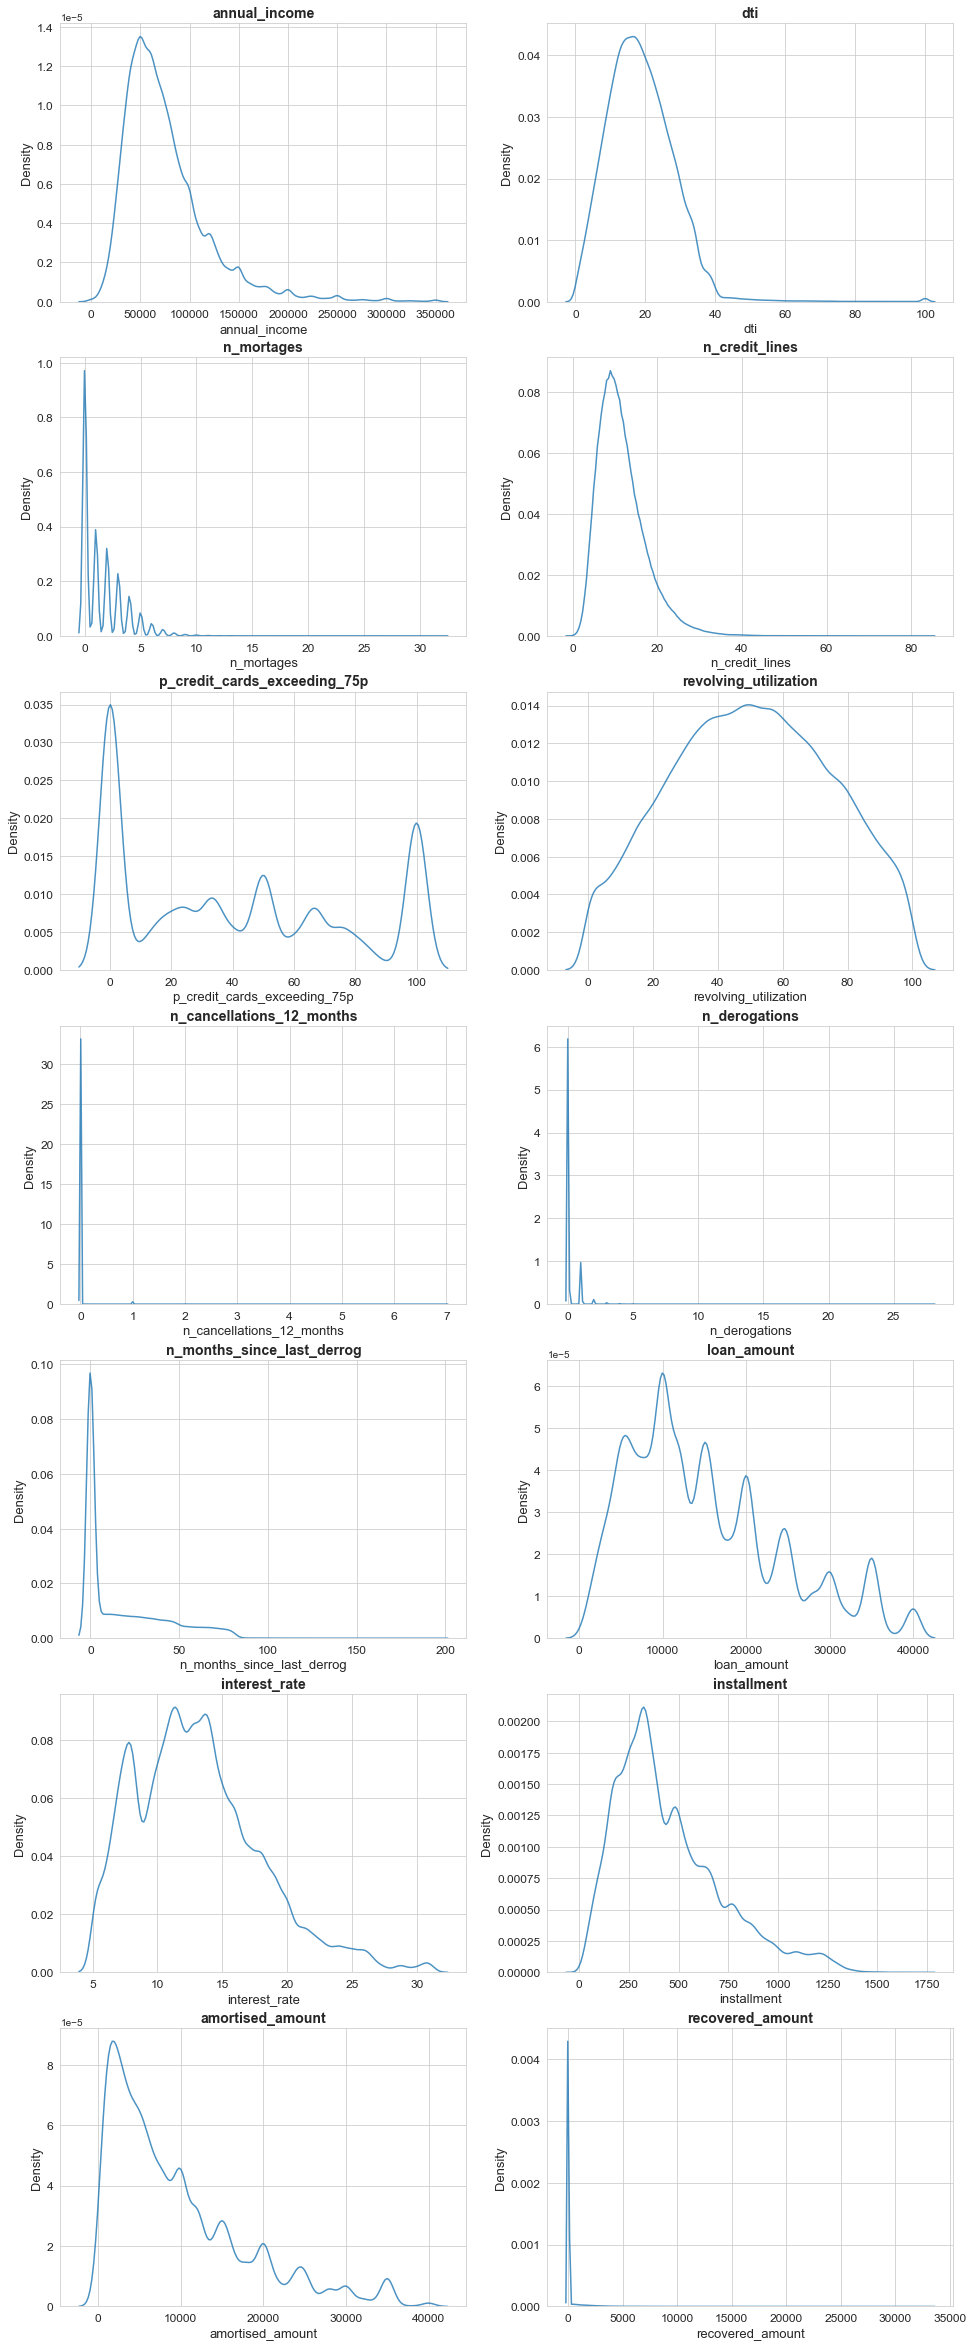

In [17]:
plot_eda_numerical(num)

`n_derogations`: Most values are 0. A binary feature will be created instead.

`p_credit_cards_exceeding_75p`: Three main groups can be clearly distinguished: those borrowers who used less than 20% of the credit available on their credit card, another group of borrowers have used between 20 and 80 percent of the available credit on their credit card, and a last group of borrower who have used more than 80% of their available credit on their credit card. A new discretised variable will be created.

Amortised amount and recovered amount rates will be analysed in more detail as they will be relevant for the Loss Given Default predictive model.

In [18]:
rates = num[['loan_amount','amortised_amount','recovered_amount']].copy()

In [19]:
rates['r_amortised_amount'] = rates.amortised_amount/rates.loan_amount
rates['r_recovered_amount'] = rates.recovered_amount/rates.loan_amount

In [20]:
rates.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amount,139407.0,15029.807506,9163.396132,1000.0,8000.000000,12800.000000,20000.000,40000.000000
amortised_amount,139407.0,9490.419229,8284.488139,0.0,3000.000000,7000.000000,13830.435,40000.000000
recovered_amount,139407.0,145.505255,761.050162,0.0,0.000000,0.000000,0.000,33407.160000
r_amortised_amount,139407.0,0.662074,0.369471,0.0,0.273872,0.869176,1.000,1.000012
r_recovered_amount,139407.0,0.009019,0.041370,0.0,0.000000,0.000000,0.000,1.207635


`r_recovered_amount`: Note that the maximum value is above 1, indicating that more has been recovered than was initially lent. It will be taken into account when creating the target of the LGD predictive model.

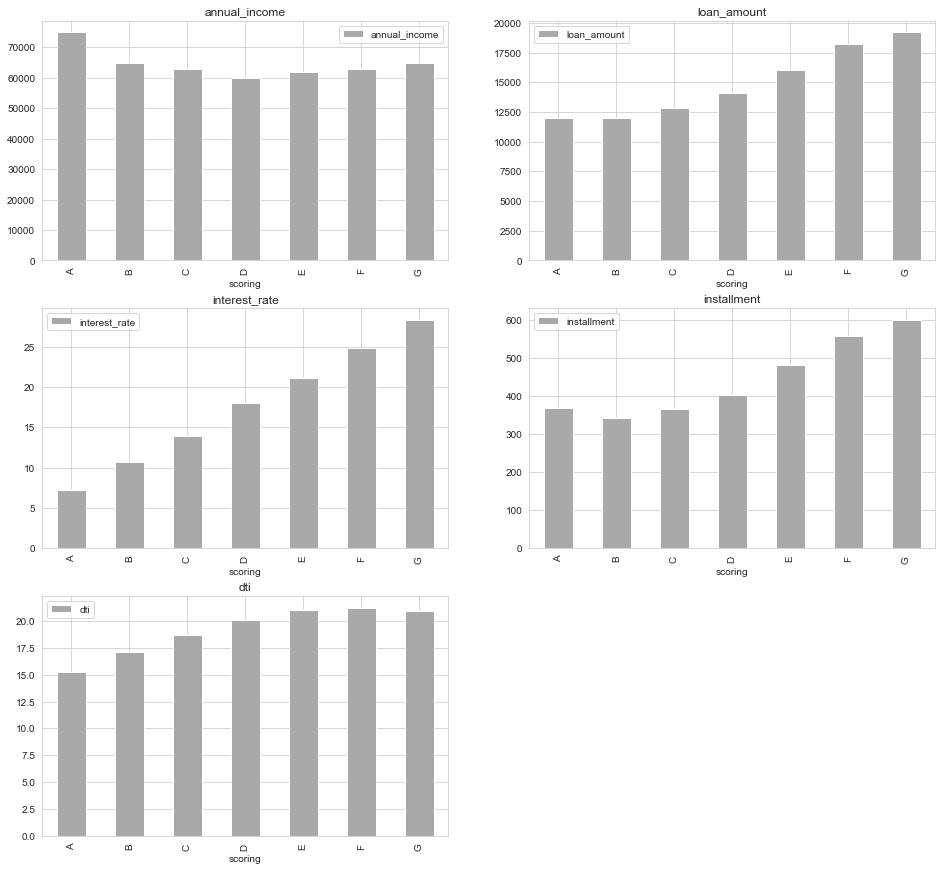

In [21]:
pd.concat([cat,num],axis=1)[['scoring','annual_income','loan_amount','interest_rate','installment','dti']] \
  .groupby('scoring').median().plot(subplots=True, sharex=False, kind='bar', layout=(3,2), figsize=(16,15), color='darkgrey');

Borrowers with poorer credit scores tend to borrow larger amounts and have lower annual incomes than clients with higher credit scores, thus paying higher monthly instalments and higher interest rates.

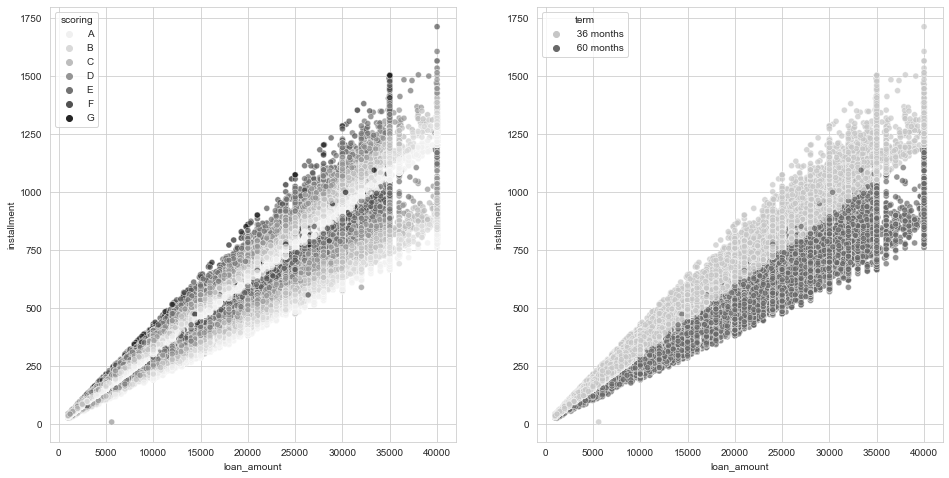

In [22]:
f,ax = plt.subplots(1,2,figsize=(16,8))
sns.scatterplot(data=num,x='loan_amount',y='installment', ax=ax[0],
                hue=cat['scoring'], hue_order=['A','B','C','D','E','F','G'], palette='Greys', alpha=0.7)
sns.scatterplot(data=num,x='loan_amount',y='installment', ax=ax[1],
                hue=cat['term'], palette='Greys', alpha=0.7);

As expected, long-term loans have lower monthly instalments. Clients with worse credit scores pay higher monthly amounts than clients with better credit scores as the loan amount increases.

Finally, the relationship between loan `status` and the `recovered_amount` feature is analysed:

In [23]:
cat[['status']].merge(num[['recovered_amount']], left_index=True, right_index=True).groupby('status').recovered_amount.mean()

status
Charged Off                                            1231.238799
Current                                                   0.000000
Default                                                   0.000000
Does not meet the credit policy. Status:Charged Off     682.649231
Does not meet the credit policy. Status:Fully Paid        0.000000
Fully Paid                                                0.000000
In Grace Period                                           0.000000
Late (16-30 days)                                         0.000000
Late (31-120 days)                                        0.000000
Name: recovered_amount, dtype: float64

It can be ensured that 'Charged off' and 'Does not meet the credit policy. Status:Charged Off' categories correspond to defaults as there is a certain amount recovered in these categories.

Note that this does not imply that there are no other categories that should also be considered as default. A more in-depth analysis will be carried out during the feature transformation stage.

## OPERATIONAL CONCLUSIONS

During feature transformation stage:
1. `targets`: Create the targets for probability of default (PD), exposure at default (EAD) and loss given default (LGD) predictive models.
2. `home_ownership`: Group 'ANY', 'OTHER' and 'NONE' categories under the majority category ('MORTGAGE').
3. `purpose`: Group 'wedding', 'renewable_energy' and 'educational' purposes under 'other' category.
4. `p_credit_cards_exceeding_75p`: Discretise into three groups [0,20), [20,80), [80,100].
5. `n_derogations`: Create a binary feature `has_derog` ('Yes', 'No') instead.

## INSIGHTS

**Borrowers:**
- Borrowers with poorer credit scores tend to borrow larger amounts and have lower annual incomes than clients with higher credit scores, thus paying higher monthly installments and higher interest rates.
- One third of all customers have been employed for more than 10 years. The job title of most clients is unknown. Of the clients who do provide this information, the top three most frequent jobs are 'Teacher', 'Manager' and 'Owner'.
- The score feature appears to be predictive of loan status: the percentage of loans charged off increases as the borrower's credit score worsens while the percentage of fully paid loans increases as the borrower's credit score increases.
- Three main groups can be clearly distinguished: those borrowers who used less than 20% of the credit available on their credit card, another group of borrowers have used between 20 and 80 percent of the available credit on their credit card, and a last group of borrower who have used more than 80% of their available credit on their credit card.

**Loans:**
- In general, 60-month loans tend to have a higher percentage of late payments and charge-offs.
- The percentage of loans charged off for 'moving' and 'small business' purposes is slightly higher (16%-17%) than the average for the rest of loan purposes (around 11%).

## SAVING DATASETS AFTER EDA

Dataframes df, cat and num will be saved once exploratory data analysis procedures have been applied.

In pickle format so as not to lose metadata modifications.

### Defining dataset names

In [ ]:
path_work = project_path + '/02_Data/03_Work/' + 'work_result_eda.pickle'
path_cat = project_path + '/02_Data/03_Work/' + 'cat_result_eda.pickle'
path_num = project_path + '/02_Data/03_Work/' + 'num_result_eda.pickle'

### Saving datasets

In [ ]:
df = pd.concat([cat,num],axis=1)

In [ ]:
df.to_pickle(path_work)
cat.to_pickle(path_cat)
num.to_pickle(path_num)